# FoNS Datathon 2021 

In [1]:
# Import pandas to store data in tables (called DataFrames)
import pandas as pd

# numpy arrays to store numbers in vector sequences - only used for plotting graphs here
import numpy as np

# matplotlib is the graphical library used to show the correlation between
# predicted values and actual values.
import matplotlib.pyplot as plt

# sklearn (sci-kit-learn) is the library which contains all the machine learning algortihms.
from sklearn import *


In [3]:
# Import the training datasets via pandas "read_csv(filepath.csv)" function.
# As the files are in the same folder as the "Getting_started.ipynb" notebook file
# we dont need to include a filepath, just the name of the file.
train_descriptors = pd.read_csv("train_descriptors.csv")
train_mord3d = pd.read_csv("train_mord3d.csv")
train_morgan = pd.read_csv("train_morgan.csv")
train_rdk = pd.read_csv("train_rdk.csv")

train_crystals = pd.read_csv("train_crystals.csv")
train_distances = pd.read_csv("train_distances.csv")
train_centroid_distances = pd.read_csv("train_centroid_distances.csv")

In [4]:
# Same as above for the test sets
test_descriptors = pd.read_csv("test_descriptors.csv")
test_mord3d = pd.read_csv("test_mord3d.csv")
test_morgan = pd.read_csv("test_morgan.csv")
test_rdk = pd.read_csv("test_rdk.csv")

In [5]:
# Example showing the train_descriptors dataframe
train_descriptors

,identifiers,Unnamed: 0,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,InchiKey,SMILES
0,COXSUE,11365,Optimised_Molecules_V3.3460,8.773011,8.632564,0,0,14.599164,2.244739,4.388162,...,185.062283,8.046186,219,11,54.0,58.0,4.833333,2.777778,UYSCRWBEPUAZRA-UHFFFAOYSA-N,CC(=O)NN=C(C)C1=NCCS1
1,TUWFAU,58476,Optimised_Molecules_V3.19496,10.813451,10.346393,0,0,18.488707,2.357869,4.715737,...,199.110947,7.111105,364,22,70.0,80.0,6.805556,3.583333,RYPSYCXCJSHDJX-UHFFFAOYSA-N,CC(C)N(C)c1ccc(C#N)cc1C#N
2,DUTHEG,31879,Optimised_Molecules_V3.5074,10.922841,9.584172,0,0,16.685332,2.436274,4.872549,...,191.080710,8.307857,271,22,74.0,87.0,5.666667,3.000000,PVRUUABKIQNQFL-UHFFFAOYSA-N,Cc1cc(=O)n2c(N)nc(C)nc2n1
3,AXUDED08,2885,Optimised_Molecules_V3.988,7.140017,6.873356,0,0,12.857279,2.214320,4.428639,...,136.052429,7.558468,121,11,44.0,48.0,3.722222,2.444444,QPJVMBTYPHYUOC-UHFFFAOYSA-N,COC(=O)c1ccccc1
4,ARAGUV,2660,Optimised_Molecules_V3.795,7.399237,7.308033,0,0,11.638727,2.249778,4.311276,...,139.074562,7.319714,125,8,46.0,49.0,4.333333,2.250000,LUFRABHJXNJTNZ-UHFFFAOYSA-N,CC(=O)Nc1cc(C)[nH]n1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,GICQAN01,34720,Optimised_Molecules_V3.7209,11.589507,11.335446,0,0,18.593111,2.444247,4.716186,...,214.008667,12.588745,344,20,78.0,92.0,5.916667,3.277778,AMGTUMYRSHDKFL-UHFFFAOYSA-N,Nc1nc(-c2c([N+](=O)[O-])no[n+]2[O-])no1
13445,UNDECO,58781,Optimised_Molecules_V3.19870,8.594671,6.996374,0,0,15.070075,2.071027,4.107492,...,168.151415,5.254732,206,13,50.0,51.0,3.611111,2.916667,UPOSSYJVWXLPTA-UHFFFAOYSA-N,O=C1CCCCCCCCCC1
13446,IHECIH,38371,Optimised_Molecules_V3.9058,8.065904,7.608752,1,0,13.246202,2.248763,4.497527,...,153.042593,8.502366,158,12,50.0,54.0,4.583333,2.527778,VMONVJKJUDZYIE-UHFFFAOYSA-N,O=C(O)Cn1ccccc1=O
13447,MQUCXA11,45201,Optimised_Molecules_V3.12909,10.813451,9.387164,0,0,17.683997,2.402187,4.804373,...,186.079313,7.753305,283,21,72.0,84.0,5.055556,3.083333,AMOPWISLTWLTGM-UHFFFAOYSA-N,Cc1cc(C(N)=O)nc2ccccc12


### Data pre-processing

In [9]:
# Take all the rows of the train_descriptors DataFrame (:), and make a new DataFrame
# which only contains data from the third column up to the second to last column (3:-2).
# Drop any columns which have missing data (.dropna(...)).
train_descriptors_full = train_descriptors.iloc[:, 3:-2].dropna(axis= 1, how="any")

# Comparing the two, we see a loss of 634 columns.
# Train_descriptors_full can now be used to train a regression algorithm
print(train_descriptors.shape)
print(train_descriptors_full.shape)

(13449, 1618)
(13449, 984)


In [11]:
# Make sure that the test set has all the same data as the training set.
test_descriptors_full = test_descriptors[train_descriptors_full.columns]
test_descriptors_full.shape

(3363, 984)

In [14]:
# Checking that the test set contains no missing values either.
test_descriptors_full_na = test_descriptors_full.dropna(axis= 1, how="any")
test_descriptors_full_na.shape

(3363, 984)

In [19]:
# Principal component analysis

# From the decomposition module in sklearn, set up a PCA analysis function.
# The number of principal components selected to complete the analysis is
# the number of principal components required to satisfy 95% of the variance in the data.
train_PCA = decomposition.PCA(n_components=.95)

# The scaler allows for removing the bias from data which is orders of magnitude larger than
# other data in the dataset. the StandardScaler function is called from the preprocessing module.
scaler_for_PCA = preprocessing.StandardScaler()


# Scale all the values in train_descriptors_full according to the StandardScaler routine
scaled_values = scaler_for_PCA.fit_transform(train_descriptors_full)

# Do the PCA analysis on the scaled values
train_descriptors_PCA = train_PCA.fit_transform(scaled_values)

# fit the test descriptors on the first principal components 
# previously extracted from the training set.
test_descriptors_PCA = train_PCA.transform(scaler_for_PCA.transform(test_descriptors_full))
print(train_descriptors_PCA.shape, test_descriptors_PCA.shape)

(13449, 124) (3363, 124)


### A (very!!) simple and bad model

sklearn docs for linear regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [22]:
# This step sets up the linear regression algorithm with the target
# to predict the "a" values in the train_crystals DataFrame.
# the training values take the form of the 124 Principal components
# that were extracted from the train_descriptors DataFrame

target = "a"
model = linear_model.LinearRegression()
model.fit(train_descriptors_PCA, train_crystals[target])

LinearRegression()

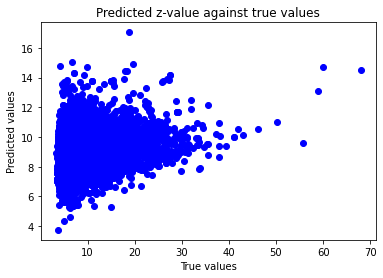

In [8]:
# Now use the fitted regression model to predict
# the "a" values
predictions = model.predict(train_descriptors_PCA)

# Plot the true "a" values against the predicted values
plt.plot(train_crystals[target], predictions, "bo")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted z-value against true values")
plt.show()

### Cross-validation to evaluate the model's performance

sklearn docs on CV: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [9]:
cv_scores = model_selection.cross_val_score(
    model, 
    train_descriptors_PCA, 
    train_crystals[target], 
    scoring="neg_mean_absolute_error")

print("Average negative MAE:", round(np.mean(cv_scores), 3))
print("Standard deviation:", round(np.std(cv_scores), 3))

Average negative MAE: -3.258
Standard deviation: 0.05


### Outputting predictions for automated checking 
Link: https://github.com/stevenkbennett/fons_datathon_testing

In [10]:
predictions = model.predict(test_descriptors_PCA)

In [11]:
np.savetxt("task_x_predictions.csv", predictions)
# Alternatively, if using pandas, you can use the following:
pd.DataFrame(predictions).to_csv("task_x_predictions.csv", header=False, index=False)